C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_24988\369482917.py:145: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='H')



Model Accuracy Metrics:
RMSE: 4.7458
MAE: 3.7810
MAPE: 4.0705
R2: 0.9310
Max Error: 13.6008
Mean Error: -0.1115
Std Error: 4.7444


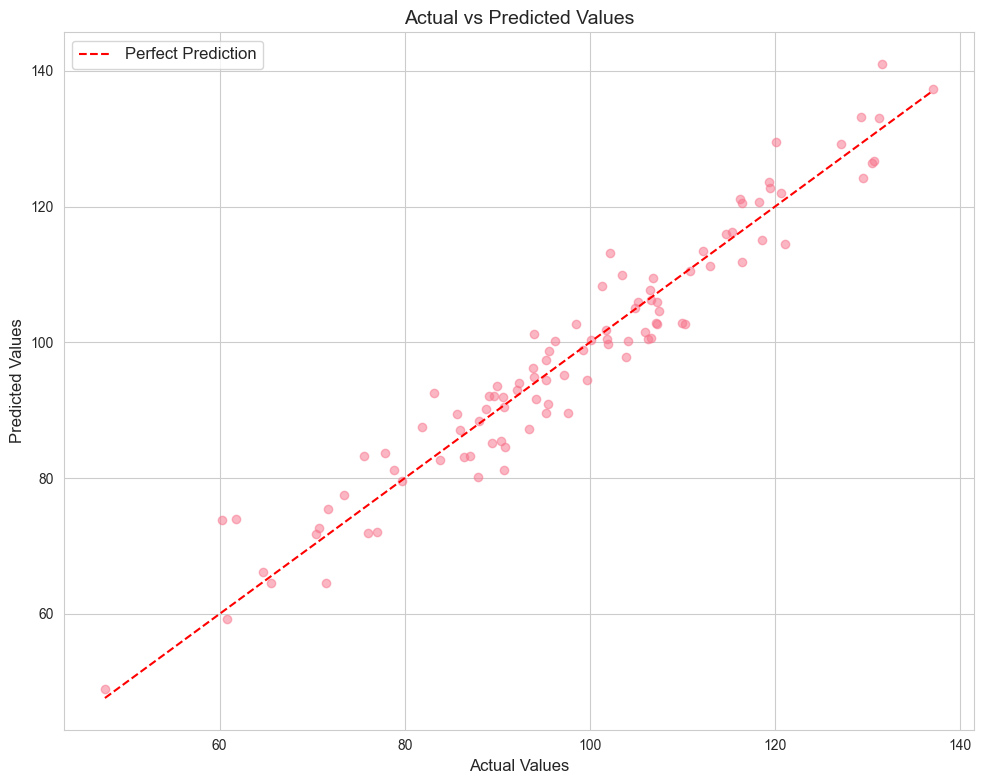

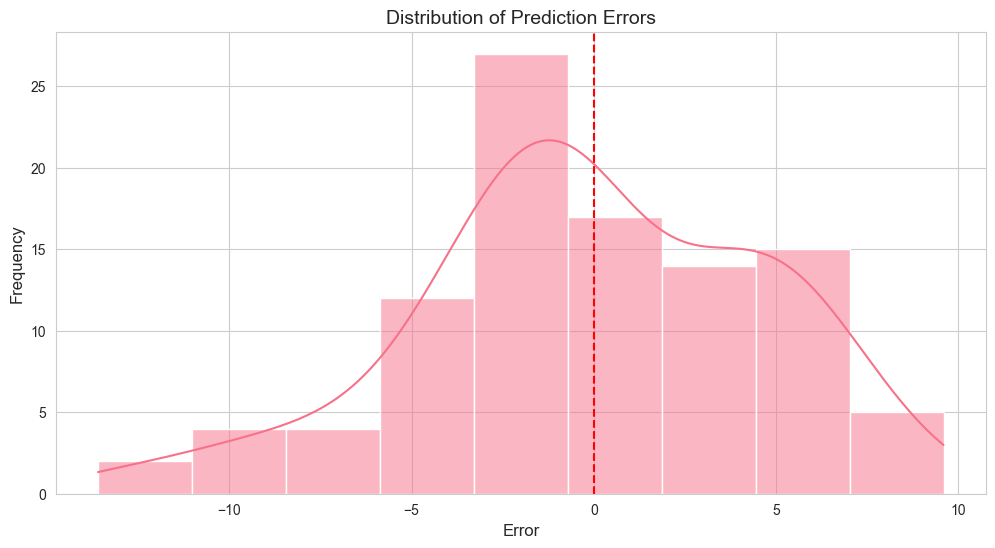

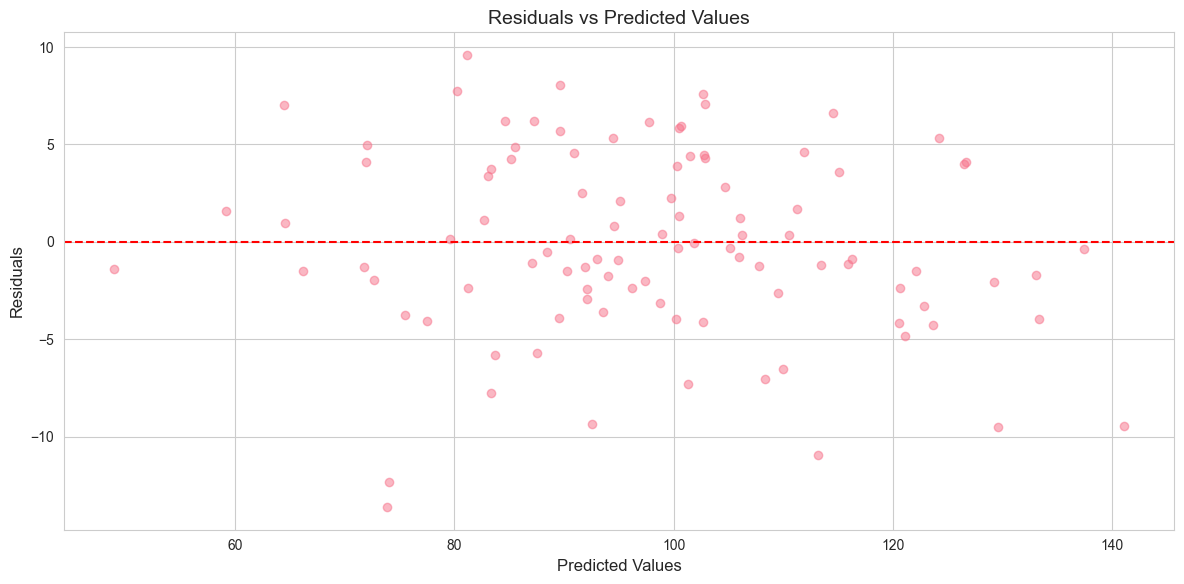

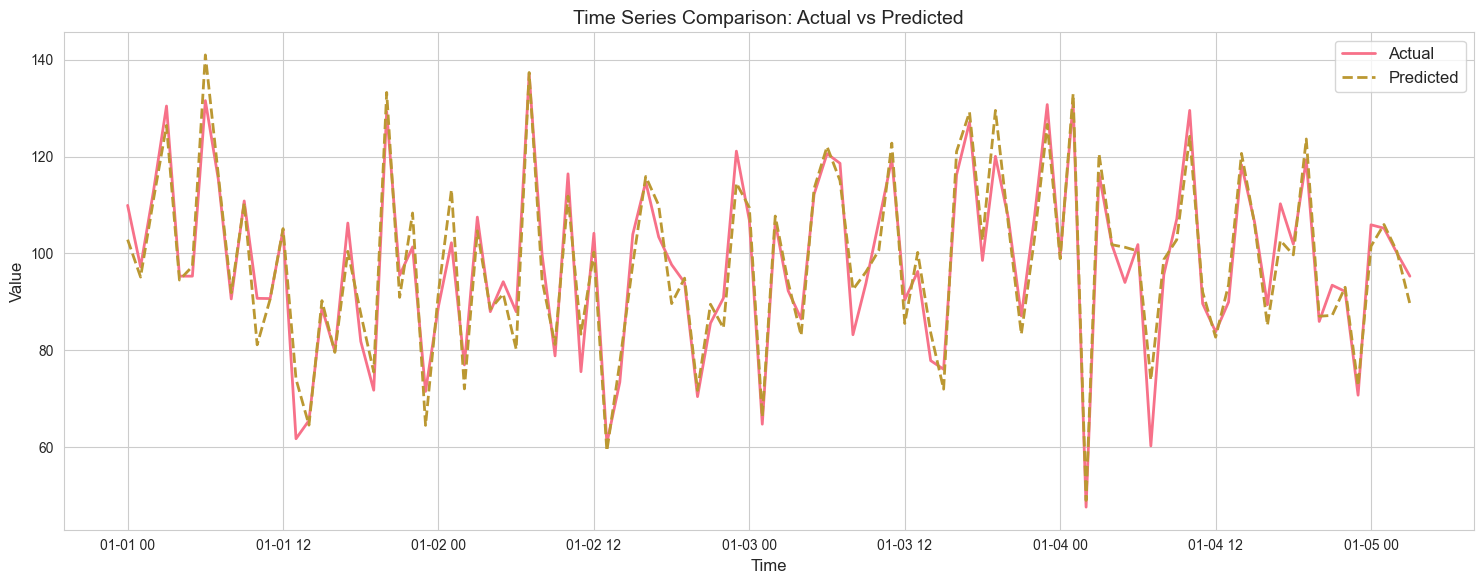

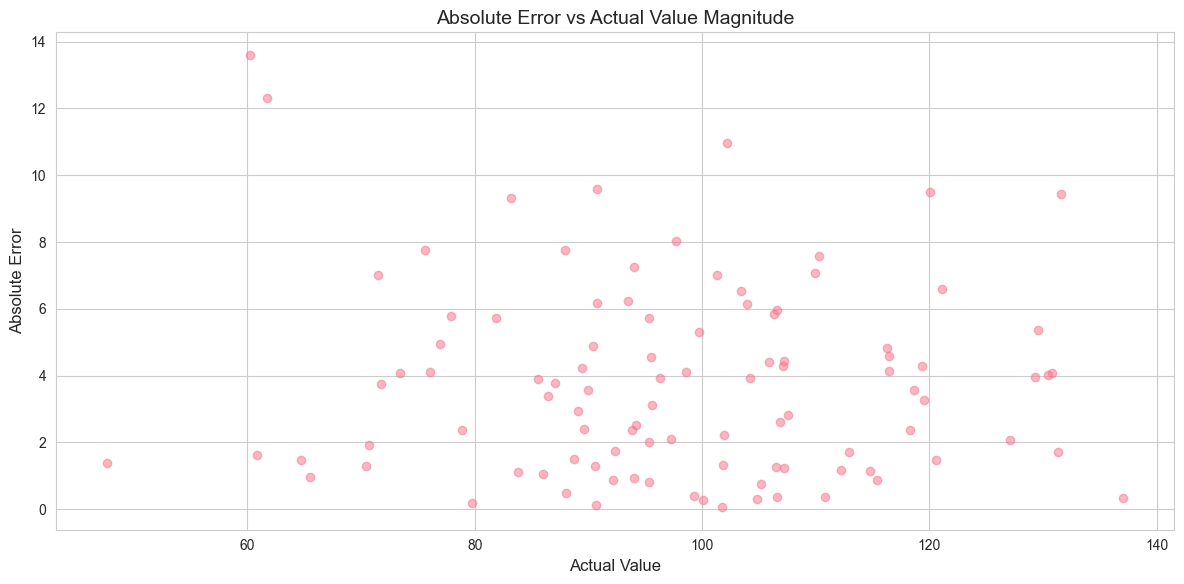

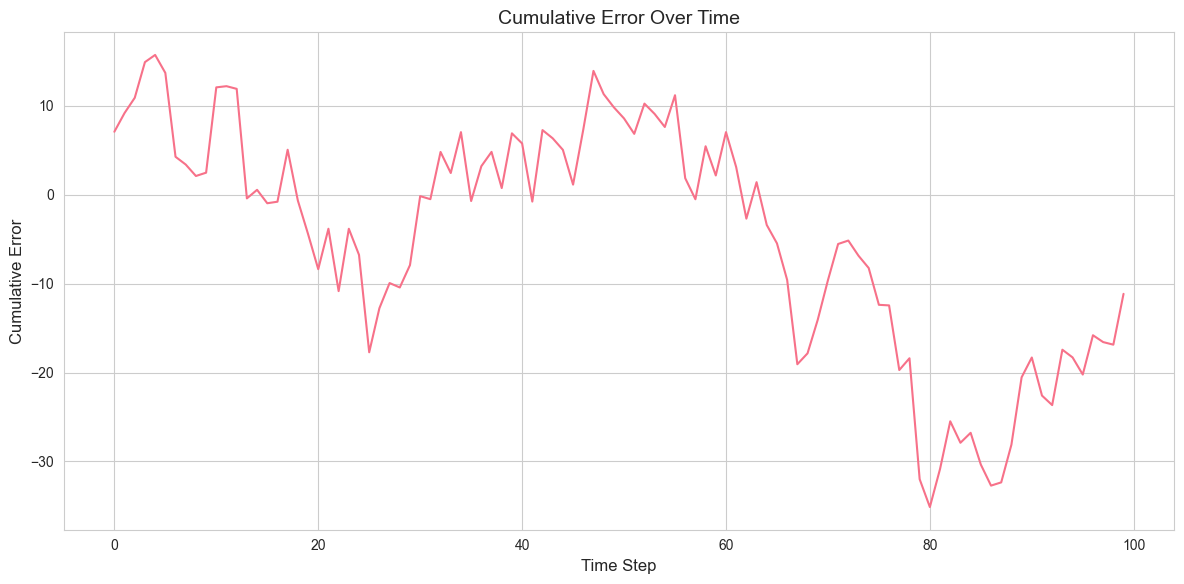


Detailed Analysis:
Mean Absolute Error (MAE): 3.78
Root Mean Squared Error (RMSE): 4.75
Mean Absolute Percentage Error (MAPE): 4.07%
R-squared Score: 0.9310
Maximum Error: 13.60
Mean Error: -0.11
Standard Deviation of Error: 4.74


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)
from scipy import stats

class ModelAccuracyChecker:
    def __init__(self):
        # Set style for better visualizations
        sns.set_style("whitegrid")
        sns.set_palette("husl")
        plt.rcParams['figure.figsize'] = [12, 8]
        plt.rcParams['font.size'] = 12
        plt.rcParams['axes.labelsize'] = 12
        plt.rcParams['axes.titlesize'] = 14
        plt.rcParams['xtick.labelsize'] = 10
        plt.rcParams['ytick.labelsize'] = 10

    def calculate_metrics(self, y_true, y_pred):
        """Calculate various accuracy metrics"""
        metrics = {
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAE': mean_absolute_error(y_true, y_pred),
            'MAPE': mean_absolute_percentage_error(y_true, y_pred) * 100,
            'R2': r2_score(y_true, y_pred),
            'Max Error': np.max(np.abs(y_true - y_pred)),
            'Mean Error': np.mean(y_true - y_pred),
            'Std Error': np.std(y_true - y_pred)
        }
        return metrics

    def plot_prediction_comparison(self, y_true, y_pred, title='Actual vs Predicted Values'):
        """Plot actual vs predicted values"""
        plt.figure(figsize=(10, 8))
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], 
                [y_true.min(), y_true.max()], 
                'r--', label='Perfect Prediction')
        plt.title(title)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_error_distribution(self, y_true, y_pred):
        """Plot distribution of prediction errors"""
        errors = y_true - y_pred
        plt.figure(figsize=(12, 6))
        sns.histplot(data=errors, kde=True)
        plt.axvline(x=0, color='r', linestyle='--')
        plt.title('Distribution of Prediction Errors')
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    def plot_residuals(self, y_true, y_pred):
        """Plot residuals vs predicted values"""
        residuals = y_true - y_pred
        plt.figure(figsize=(12, 6))
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Residuals vs Predicted Values')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_time_series_comparison(self, y_true, y_pred, dates=None):
        """Plot time series comparison of actual and predicted values"""
        plt.figure(figsize=(15, 6))
        if dates is not None:
            plt.plot(dates, y_true, label='Actual', linewidth=2)
            plt.plot(dates, y_pred, label='Predicted', linestyle='--', linewidth=2)
        else:
            plt.plot(y_true, label='Actual', linewidth=2)
            plt.plot(y_pred, label='Predicted', linestyle='--', linewidth=2)
        plt.title('Time Series Comparison: Actual vs Predicted')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_error_by_magnitude(self, y_true, y_pred):
        """Plot absolute error vs actual value magnitude"""
        absolute_errors = np.abs(y_true - y_pred)
        plt.figure(figsize=(12, 6))
        plt.scatter(y_true, absolute_errors, alpha=0.5)
        plt.title('Absolute Error vs Actual Value Magnitude')
        plt.xlabel('Actual Value')
        plt.ylabel('Absolute Error')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_cumulative_error(self, y_true, y_pred):
        """Plot cumulative error over time"""
        cumulative_error = np.cumsum(y_true - y_pred)
        plt.figure(figsize=(12, 6))
        plt.plot(cumulative_error)
        plt.title('Cumulative Error Over Time')
        plt.xlabel('Time Step')
        plt.ylabel('Cumulative Error')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def analyze_accuracy(self, y_true, y_pred, dates=None):
        """Perform comprehensive accuracy analysis"""
        # Calculate metrics
        metrics = self.calculate_metrics(y_true, y_pred)
        print("\nModel Accuracy Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

        # Generate all plots
        self.plot_prediction_comparison(y_true, y_pred)
        self.plot_error_distribution(y_true, y_pred)
        self.plot_residuals(y_true, y_pred)
        self.plot_time_series_comparison(y_true, y_pred, dates)
        self.plot_error_by_magnitude(y_true, y_pred)
        self.plot_cumulative_error(y_true, y_pred)

        return metrics

# Example usage
if __name__ == "__main__":
    # Initialize the checker
    checker = ModelAccuracyChecker()
    
    # Generate sample data
    np.random.seed(42)
    n_samples = 100
    dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='H')
    y_true = np.random.normal(100, 20, n_samples)
    y_pred = y_true + np.random.normal(0, 5, n_samples)  # Add some noise
    
    # Perform accuracy analysis
    metrics = checker.analyze_accuracy(y_true, y_pred, dates)
    
    # Print metrics
    print("\nDetailed Analysis:")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.2f}%")
    print(f"R-squared Score: {metrics['R2']:.4f}")
    print(f"Maximum Error: {metrics['Max Error']:.2f}")
    print(f"Mean Error: {metrics['Mean Error']:.2f}")
    print(f"Standard Deviation of Error: {metrics['Std Error']:.2f}")